In [21]:
import pandas as pd 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('skool.csv')

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df['num_characters'] = df['post'].apply(len)

In [9]:
df['num_words'] = df['post'].apply(lambda x:len(nltk.word_tokenize(x)))

# words ke basis pe break ho jayega nltk.word_tokenize ke through

In [10]:
df.head()

,post,label,num_characters,num_words
0,🚀 Welcome to the Python Developers Community!💡...,1,505,111
1,What do I benefit from Python?Hello I'm new he...,0,189,48
2,"IntroductionHello everybody, I am new here fro...",0,78,14
3,Aspiring Python Developer | Ready to Learn & W...,1,323,73
4,Quant Research and FinanceHey everyone! Does a...,1,550,119


In [12]:
df['num_sentences'] = df['post'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,post,label,num_characters,num_words,num_sentences
0,🚀 Welcome to the Python Developers Community!💡...,1,505,111,13
1,What do I benefit from Python?Hello I'm new he...,0,189,48,1
2,"IntroductionHello everybody, I am new here fro...",0,78,14,1
3,Aspiring Python Developer | Ready to Learn & W...,1,323,73,2
4,Quant Research and FinanceHey everyone! Does a...,1,550,119,7


In [13]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,293.000000,293.000000,293.000000
mean,464.399317,94.139932,4.522184
std,458.406159,94.539425,4.226104
min,14.000000,2.000000,1.000000
25%,159.000000,31.000000,2.000000
50%,304.000000,61.000000,3.000000
75%,639.000000,128.000000,6.000000
max,2235.000000,453.000000,27.000000


In [15]:
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,160.000000,160.000000,160.000000
mean,443.006250,89.431250,4.431250
std,450.886011,94.303646,4.170308
min,14.000000,2.000000,1.000000
25%,133.000000,26.000000,1.000000
50%,270.000000,55.000000,3.000000
75%,653.750000,128.000000,6.000000
max,2040.000000,431.000000,27.000000


In [16]:
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,133.000000,133.000000,133.000000
mean,490.135338,99.804511,4.631579
std,467.699411,94.867488,4.305517
min,24.000000,4.000000,1.000000
25%,182.000000,36.000000,2.000000
50%,338.000000,68.000000,4.000000
75%,604.000000,129.000000,6.000000
max,2235.000000,453.000000,27.000000


<Axes: xlabel='num_characters', ylabel='Count'>

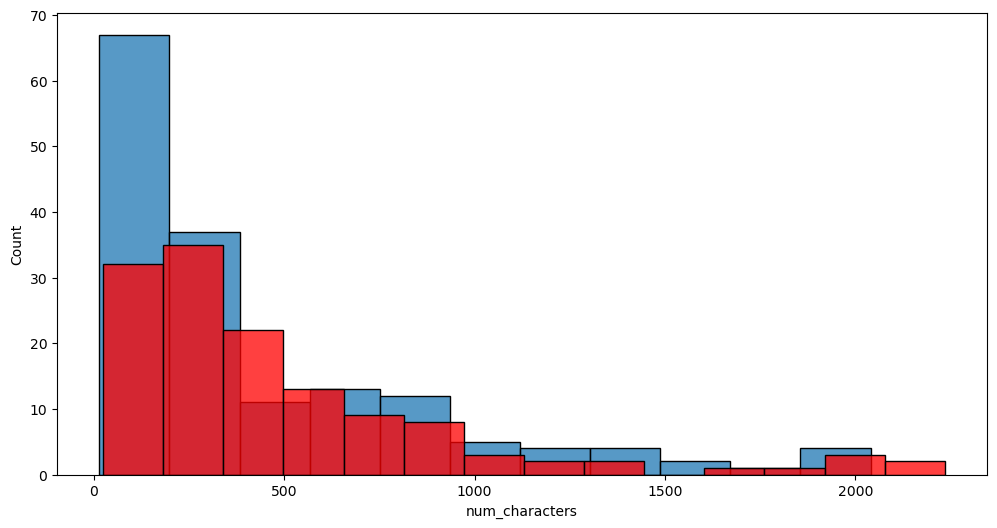

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

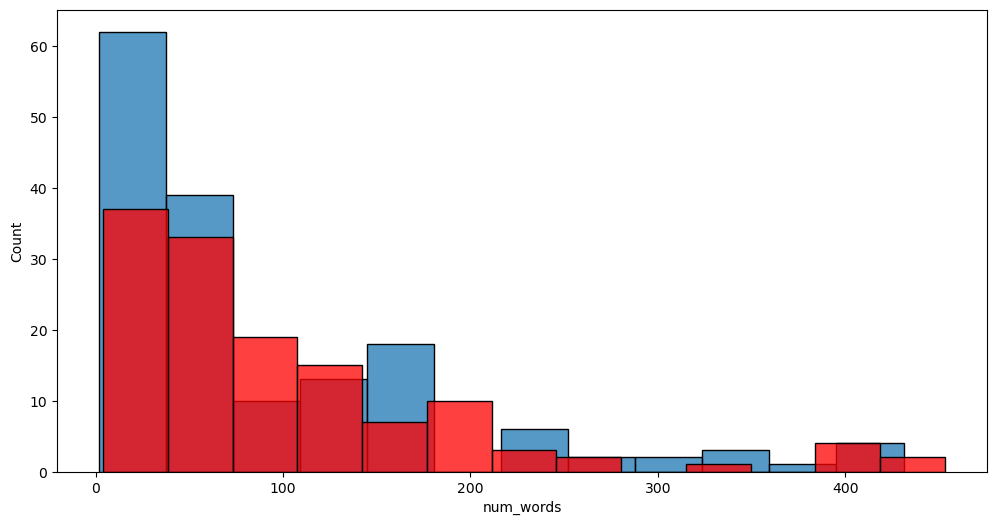

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

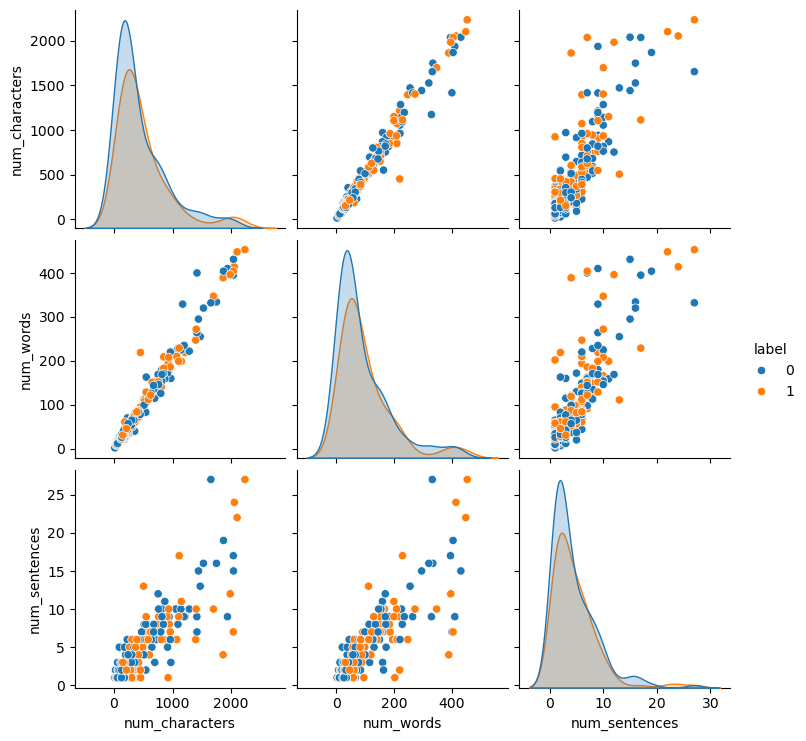

In [32]:
sns.pairplot(df,hue='label')

In [37]:
df

,post,label,num_characters,num_words,num_sentences
0,🚀 Welcome to the Python Developers Community!💡...,1,505,111,13
1,What do I benefit from Python?Hello I'm new he...,0,189,48,1
2,"IntroductionHello everybody, I am new here fro...",0,78,14,1
3,Aspiring Python Developer | Ready to Learn & W...,1,323,73,2
4,Quant Research and FinanceHey everyone! Does a...,1,550,119,7
...,...,...,...,...,...
288,"PythonPython code! def sum_two_numbers(a, b): ...",0,133,33,2
289,Hello!Hi im Fry I’ve been coding in python for...,0,168,42,3
290,IntroductionHi my name William. I’ve been codi...,1,151,31,3
291,IntroductionHello I’m Mason Broten and I took ...,0,241,57,4


In [38]:
num_col = df.select_dtypes(exclude = 'object')

In [39]:
num_col.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.051274,0.054722,0.023641
num_characters,0.051274,1.000000,0.986640,0.846548
num_words,0.054722,0.986640,1.000000,0.836477
num_sentences,0.023641,0.846548,0.836477,1.000000


<Axes: >

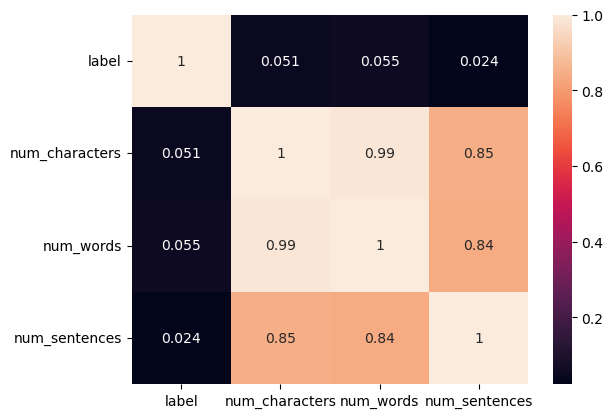

In [40]:
sns.heatmap(num_col.corr(),annot=True)

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [49]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(post):
    # Remove emojis using regex
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    post = emoji_pattern.sub(r'', post)

    # Lowercasing
    post = post.lower()

    # Tokenization
    post = nltk.word_tokenize(post)

    # Remove non-alphanumeric
    y = []
    for i in post:
        if i.isalnum():
            y.append(i)

    # Remove stopwords and punctuation
    post = y[:]
    y.clear()
    for i in post:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    post = y[:]
    y.clear()
    for i in post:
        y.append(ps.stem(i))

    return " ".join(y)


In [50]:
df['post'][0]

"🚀 Welcome to the Python Developers Community!💡 Get Started: ✅ Introduce Yourself: Share your Python journey in the Introductions & Wins category! ✅ Ask Questions: Use the Help & Q&A section – we're here to support you. ✅ Explore the Courses: Dive into our structured Python learning materials. ✅ Engage: Comment, share your knowledge, and connect with fellow developers. 🎖️ Level Up: Earn XP by participating! 📜 Quick Rules: 1. Be respectful. 2. No spam. 3. Help each other! Let's learn Python together! 🚀"

In [53]:
transform_text("🚀 Welcome to the Python Developers Community!💡 Get Started: ✅ Introduce Yourself: Share your Python journey in the Introductions & Wins category! ✅ Ask Questions: Use the Help & Q&A section – we're here to support you. ✅ Explore the Courses: Dive into our structured Python learning materials. ✅ Engage: Comment, share your knowledge, and connect with fellow developers. 🎖️ Level Up: Earn XP by participating! 📜 Quick Rules: 1. Be respectful. 2. No spam. 3. Help each other! Let's learn Python together! 🚀")


'welcom python develop commun get start introduc share python journey introduct win categori ask question use help q section support explor cours dive structur python learn materi engag comment share knowledg connect fellow develop level earn xp particip quick rule respect spam help let learn python togeth'

In [54]:
df['transformed_text'] = df['post'].apply(transform_text)

In [55]:
df

,post,label,num_characters,num_words,num_sentences,transformed_text
0,🚀 Welcome to the Python Developers Community!💡...,1,505,111,13,welcom python develop commun get start introdu...
1,What do I benefit from Python?Hello I'm new he...,0,189,48,1,benefit python hello new hope get question lea...
2,"IntroductionHello everybody, I am new here fro...",0,78,14,1,introductionhello everybodi new india know hin...
3,Aspiring Python Developer | Ready to Learn & W...,1,323,73,2,aspir python develop readi learn work low cost...
4,Quant Research and FinanceHey everyone! Does a...,1,550,119,7,quant research financehey everyon anyon know q...
...,...,...,...,...,...,...
288,"PythonPython code! def sum_two_numbers(a, b): ...",0,133,33,2,pythonpython code def b return b result 5 prin...
289,Hello!Hi im Fry I’ve been coding in python for...,0,168,42,3,hello hi im fri code python around 4 year proj...
290,IntroductionHi my name William. I’ve been codi...,1,151,31,3,introductionhi name william code python 1 year...
291,IntroductionHello I’m Mason Broten and I took ...,0,241,57,4,introductionhello mason broten took one python...


In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
viral_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

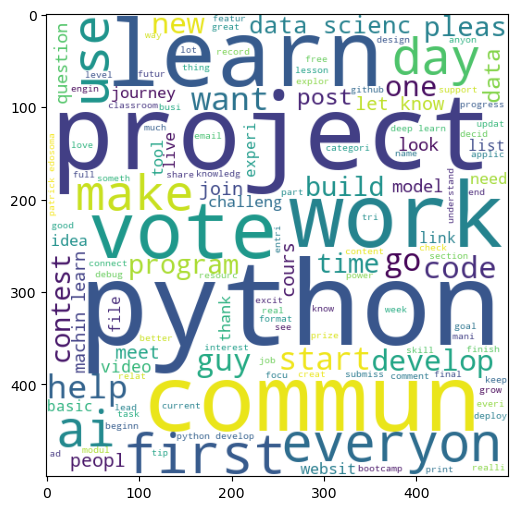

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(viral_wc)

In [59]:
not_viral_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

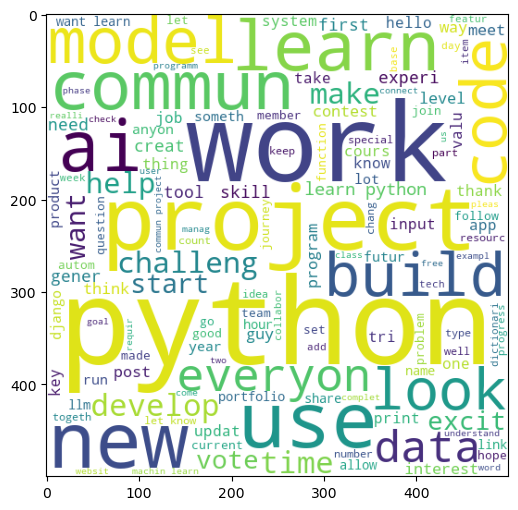

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(not_viral_wc)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [63]:
X.shape


(293, 2221)

In [64]:
y = df['label'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [67]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.4576271186440678
[[12 21]
 [11 15]]
0.4166666666666667


In [71]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.4745762711864407
[[21 12]
 [19  7]]
0.3684210526315789


In [72]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.559322033898305
[[25  8]
 [18  8]]
0.5


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.4745762711864407, 0.35294117647058826)

In [78]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.4745762711864407
Precision -  0.35294117647058826
For  KN
Accuracy -  0.5084745762711864
Precision -  0.45161290322580644
For  NB
Accuracy -  0.4745762711864407
Precision -  0.3684210526315789
For  DT
Accuracy -  0.5423728813559322
Precision -  0.42857142857142855
For  LR
Accuracy -  0.5254237288135594
Precision -  0.0
For  RF
Accuracy -  0.6101694915254238
Precision -  0.6153846153846154


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.5254237288135594
Precision -  0.4375
For  BgC
Accuracy -  0.6271186440677966
Precision -  0.6428571428571429
For  ETC
Accuracy -  0.559322033898305
Precision -  0.5
For  GBDT
Accuracy -  0.559322033898305
Precision -  0.5
For  xgb
Accuracy -  0.576271186440678
Precision -  0.5185185185185185


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [80]:
performance_df


,Algorithm,Accuracy,Precision
7,BgC,0.627119,0.642857
5,RF,0.610169,0.615385
10,xgb,0.576271,0.518519
8,ETC,0.559322,0.500000
9,GBDT,0.559322,0.500000
1,KN,0.508475,0.451613
6,AdaBoost,0.525424,0.437500
3,DT,0.542373,0.428571
2,NB,0.474576,0.368421
0,SVC,0.474576,0.352941


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [82]:
performance_df1


,Algorithm,variable,value
0,BgC,Accuracy,0.627119
1,RF,Accuracy,0.610169
2,xgb,Accuracy,0.576271
3,ETC,Accuracy,0.559322
4,GBDT,Accuracy,0.559322
5,KN,Accuracy,0.508475
6,AdaBoost,Accuracy,0.525424
7,DT,Accuracy,0.542373
8,NB,Accuracy,0.474576
9,SVC,Accuracy,0.474576


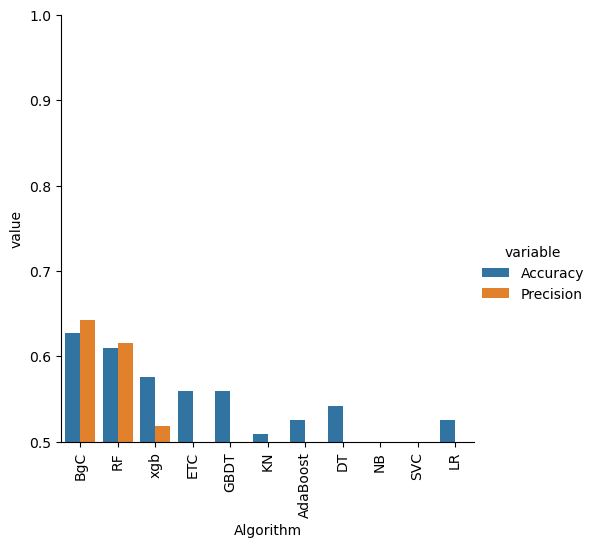

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [86]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [87]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [89]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,BgC,0.627119,0.642857,0.627119,0.642857,0.627119,0.642857,0.627119,0.642857
1,RF,0.610169,0.615385,0.610169,0.615385,0.610169,0.615385,0.610169,0.615385
2,xgb,0.576271,0.518519,0.576271,0.518519,0.576271,0.518519,0.576271,0.518519
3,ETC,0.559322,0.500000,0.559322,0.500000,0.559322,0.500000,0.559322,0.500000
4,GBDT,0.559322,0.500000,0.559322,0.500000,0.559322,0.500000,0.559322,0.500000
5,KN,0.508475,0.451613,0.508475,0.451613,0.508475,0.451613,0.508475,0.451613
6,AdaBoost,0.525424,0.437500,0.525424,0.437500,0.525424,0.437500,0.525424,0.437500
7,DT,0.542373,0.428571,0.542373,0.428571,0.542373,0.428571,0.542373,0.428571
8,NB,0.474576,0.368421,0.474576,0.368421,0.474576,0.368421,0.474576,0.368421
9,SVC,0.474576,0.352941,0.474576,0.352941,0.474576,0.352941,0.474576,0.352941


In [90]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [93]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.5932203389830508
Precision 0.5625


In [95]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [96]:
from sklearn.ensemble import StackingClassifier


In [97]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [98]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.4406779661016949
Precision 0.3793103448275862


In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))